In [1]:
import re
import glob
import math
import random
import pandas as pd
import numpy as np
np.bool = np.bool_
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as py
from sklearn import datasets
from scipy import stats
from scipy.stats import pearsonr
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.datasets import make_blobs

%matplotlib inline

In [2]:
trainDEFSDf = pd.read_csv("I:\\3_output_raMSIn\\3_3_Output_raMSIn_HKU_Ingested4ALL\\0d1\\df_train_cbMSIn0d14nonInDI_STDnorm.csv")
extDEFSDf = pd.read_csv("I:\\3_output_raMSIn\\3_3_Output_raMSIn_HKU_Ingested4ALL\\0d1\\df_ext_cbMSIn0d14nonInDI_STDnorm.csv")
ingestedDEFSDf = pd.read_csv("I:\\3_output_raMSIn\\3_3_Output_raMSIn_HKU_Ingested4ALL\\0d1\\df_ingested_cbMSIn0d14nonInDI_STDnorm.csv")
fnaDEFSDf = pd.read_csv("I:\\3_output_raMSIn\\3_3_Output_raMSIn_HKU_Ingested4ALL\\0d1\\df_FNA_cbMSIn0d14nonInDI_STDnorm.csv")
diDEFSDf = pd.read_csv("I:\\3_output_raMSIn\\3_3_Output_raMSIn_HKU_Ingested4ALL\\0d1\\df_nonInDI_cbMSIn0d14nonInDI_STDnorm.csv")

In [3]:
trainDEFSDf.describe()

,311.15,269.25,435.2,301.25,241.1,738.55,857.55,867.55,299.1,267.1,794.55,337.2,339.1,233.0,328.15,124.0,279.1,type
count,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,90960.000000
mean,7.455920e-15,1.636280e-13,-1.999443e-14,3.299667e-16,-1.014813e-14,-1.520143e-15,-3.054029e-16,-6.522601e-14,-1.727319e-14,2.208714e-13,9.289228e-15,-2.599727e-14,1.173191e-13,1.557080e-14,-9.830881e-16,1.619756e-15,7.819651e-17,0.478353
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.499534
min,-1.427786e+00,-1.042871e+00,-1.836137e+00,-3.228155e+00,-1.203295e+00,-2.765936e+00,-2.985735e+00,-2.611112e-01,-3.342514e-01,-1.028769e+00,-4.767755e-01,-1.196404e+00,-1.338469e+00,-2.953233e+00,-3.182181e+00,-3.708948e+00,-3.441100e+00,0.000000
25%,-7.872454e-01,-1.042871e+00,-1.849986e-01,-7.731393e-01,-1.203295e+00,-6.874445e-01,-6.695442e-01,-2.611112e-01,-3.342514e-01,-1.028769e+00,-4.767755e-01,-1.196404e+00,-7.493146e-01,-3.695311e-01,-7.678926e-01,-5.724160e-01,-8.316163e-01,0.000000
50%,4.210269e-02,4.171996e-01,3.025653e-01,7.979525e-03,4.355585e-01,-1.486311e-01,-1.111145e-01,-2.611112e-01,-3.342514e-01,3.472762e-01,-4.767755e-01,1.666953e-01,1.155500e-01,1.587720e-01,-1.953747e-02,-1.007015e-02,7.778110e-02,0.000000
75%,4.310016e-01,9.275262e-01,6.663106e-01,8.056566e-01,8.289561e-01,5.516012e-01,5.298401e-01,-2.611112e-01,-3.342514e-01,8.396195e-01,-4.767755e-01,6.132798e-01,5.374986e-01,5.929886e-01,6.686881e-01,5.411780e-01,7.839581e-01,1.000000
max,1.146535e+01,2.561441e+00,2.657288e+00,3.368235e+00,3.476197e+00,4.053027e+00,5.527706e+00,9.883134e+00,6.780841e+00,6.482417e+00,4.599132e+00,9.008322e+00,9.599256e+00,4.415934e+00,4.628509e+00,5.013059e+00,3.448379e+00,1.000000


In [4]:
trainDEFSDf

,pixel_id,311.15,269.25,435.2,301.25,241.1,738.55,857.55,867.55,299.1,267.1,794.55,337.2,339.1,233.0,328.15,124.0,279.1,type
0,HKULiver_Post29wk_HCCAMCLiver_Left_Mice03_Slid...,3.953210,0.561634,0.526007,-0.160672,1.020894,-1.060231,-0.241555,-0.261111,2.281684,1.847785,-0.476776,2.573681,2.457422,0.755008,-0.975763,-0.102862,-0.843752,0
1,HKULiver_Post29wk_HCCAMCLiver_Left_Mice03_Slid...,5.499377,1.488873,0.256846,-0.271471,1.328109,-0.871081,-0.168275,-0.261111,3.225803,2.603708,-0.476776,2.733761,3.349393,1.730237,-0.553603,1.203171,-0.628910,0
2,HKULiver_Post29wk_HCCAMCLiver_Left_Mice03_Slid...,3.655719,0.621905,-0.137142,-0.057255,0.946003,-1.106408,-0.443515,-0.261111,1.937129,1.625724,-0.476776,1.777652,2.445633,2.006355,-1.057817,-0.969198,-0.628777,0
3,HKULiver_Post29wk_HCCAMCLiver_Left_Mice03_Slid...,3.412890,0.428166,-0.086066,-0.275708,1.237134,-1.058673,-0.913550,-0.261111,1.543656,2.336013,1.612714,2.338674,2.351152,1.552337,-1.187617,-1.022450,-0.766370,0
4,HKULiver_Post29wk_HCCAMCLiver_Left_Mice03_Slid...,2.092271,0.750785,0.624481,-0.051827,0.741049,-1.077604,-0.591638,-0.261111,-0.334251,1.129372,-0.476776,1.323991,1.454999,0.464660,-1.028013,-0.260324,-0.620623,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90955,HKULiver_Post29wk_HCCLiver_Left_Mice12_Slide4F...,0.273014,-1.042871,1.085864,-0.876582,-1.203295,-1.416813,-1.308037,-0.261111,-0.334251,-1.028769,-0.476776,-1.196404,0.406250,0.687848,-0.532158,0.910092,-0.896244,1
90956,HKULiver_Post29wk_HCCLiver_Left_Mice12_Slide4F...,0.096808,-1.042871,1.345307,-1.077784,0.675202,-0.614252,-1.469057,-0.261111,2.964883,-1.028769,-0.476776,-1.196404,0.488193,0.410449,-0.691905,-0.276832,-1.338888,1
90957,HKULiver_Post29wk_HCCLiver_Left_Mice12_Slide4F...,0.213884,1.253220,0.874884,-1.425507,-1.203295,-0.478005,-1.083904,-0.261111,2.279959,-1.028769,-0.476776,-1.196404,0.449698,1.274415,-0.836330,0.162720,-1.001561,1
90958,HKULiver_Post29wk_HCCLiver_Left_Mice12_Slide4F...,0.402346,-1.042871,0.667639,-1.401248,-1.203295,-0.380958,-0.753560,-0.261111,2.972262,-1.028769,-0.476776,0.462734,0.308840,0.654135,-0.776998,-0.247323,-0.993475,1


In [5]:
def sns_heatmap(df):
    sns.heatmap(df, cmap="inferno", vmin=0, vmax=1.0)

In [6]:
trainDEFSDf = trainDEFSDf[trainDEFSDf.columns[1:-1]]
extDEFSDf = extDEFSDf[extDEFSDf.columns[1:-1]]
fnaDEFSDf = fnaDEFSDf[fnaDEFSDf.columns[1:-1]]
ingestedDEFSDf = ingestedDEFSDf[ingestedDEFSDf.columns[1:-1]]
diDEFSDf = diDEFSDf[diDEFSDf.columns[1:-1]]

In [7]:
trainDEFSDf

,311.15,269.25,435.2,301.25,241.1,738.55,857.55,867.55,299.1,267.1,794.55,337.2,339.1,233.0,328.15,124.0,279.1
0,3.953210,0.561634,0.526007,-0.160672,1.020894,-1.060231,-0.241555,-0.261111,2.281684,1.847785,-0.476776,2.573681,2.457422,0.755008,-0.975763,-0.102862,-0.843752
1,5.499377,1.488873,0.256846,-0.271471,1.328109,-0.871081,-0.168275,-0.261111,3.225803,2.603708,-0.476776,2.733761,3.349393,1.730237,-0.553603,1.203171,-0.628910
2,3.655719,0.621905,-0.137142,-0.057255,0.946003,-1.106408,-0.443515,-0.261111,1.937129,1.625724,-0.476776,1.777652,2.445633,2.006355,-1.057817,-0.969198,-0.628777
3,3.412890,0.428166,-0.086066,-0.275708,1.237134,-1.058673,-0.913550,-0.261111,1.543656,2.336013,1.612714,2.338674,2.351152,1.552337,-1.187617,-1.022450,-0.766370
4,2.092271,0.750785,0.624481,-0.051827,0.741049,-1.077604,-0.591638,-0.261111,-0.334251,1.129372,-0.476776,1.323991,1.454999,0.464660,-1.028013,-0.260324,-0.620623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90955,0.273014,-1.042871,1.085864,-0.876582,-1.203295,-1.416813,-1.308037,-0.261111,-0.334251,-1.028769,-0.476776,-1.196404,0.406250,0.687848,-0.532158,0.910092,-0.896244
90956,0.096808,-1.042871,1.345307,-1.077784,0.675202,-0.614252,-1.469057,-0.261111,2.964883,-1.028769,-0.476776,-1.196404,0.488193,0.410449,-0.691905,-0.276832,-1.338888
90957,0.213884,1.253220,0.874884,-1.425507,-1.203295,-0.478005,-1.083904,-0.261111,2.279959,-1.028769,-0.476776,-1.196404,0.449698,1.274415,-0.836330,0.162720,-1.001561
90958,0.402346,-1.042871,0.667639,-1.401248,-1.203295,-0.380958,-0.753560,-0.261111,2.972262,-1.028769,-0.476776,0.462734,0.308840,0.654135,-0.776998,-0.247323,-0.993475


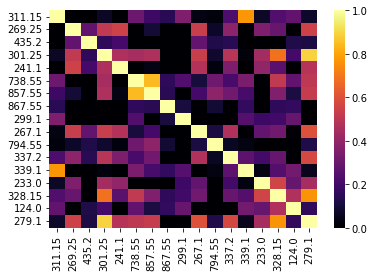

In [9]:
sns_heatmap(trainDEFSDf.corr())

In [10]:
def mz_corr(df, name):
    plt.rcParams['figure.figsize'] = [5.2, 5]
    plt.rcParams["figure.dpi"] = 600

    df_corr=df.corr()
    cor_matrix =df_corr.abs()
    upper_corr = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    return upper_corr

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
mz_corr(trainDEFSDf, "trainDEFSDf")

,311.15,269.25,435.2,301.25,241.1,738.55,857.55,867.55,299.1,267.1,794.55,337.2,339.1,233.0,328.15,124.0,279.1
311.15,NaN,0.160607,0.096873,0.063402,0.185274,0.304425,0.190997,0.145973,0.348764,0.033137,0.019536,0.229112,0.768763,0.067790,0.234823,0.273455,0.077273
269.25,NaN,NaN,0.277289,0.513974,0.549736,0.001010,0.096043,0.099419,0.136519,0.532102,0.073241,0.383193,0.203919,0.350542,0.291322,0.004696,0.550764
435.2,NaN,NaN,NaN,0.159474,0.207521,0.168309,0.007313,0.076019,0.246546,0.280149,0.126613,0.143818,0.117867,0.107430,0.079859,0.121523,0.116753
301.25,NaN,NaN,NaN,NaN,0.468330,0.447793,0.467559,0.071795,0.034024,0.532504,0.081801,0.489606,0.020872,0.438842,0.684442,0.208966,0.890905
241.1,NaN,NaN,NaN,NaN,NaN,0.033795,0.035234,0.106091,0.101305,0.479662,0.026336,0.344945,0.231280,0.394471,0.259505,0.010800,0.486327
738.55,NaN,NaN,NaN,NaN,NaN,NaN,0.841095,0.159020,0.237865,0.102781,0.308720,0.218310,0.339197,0.004798,0.514753,0.274670,0.506181
857.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.141323,0.004543,0.207302,0.382832,0.314104,0.214314,0.135914,0.354796,0.110812,0.524304
867.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107865,0.082098,0.090941,0.068071,0.166151,0.005384,0.156510,0.164597,0.041117
299.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.063043,0.070973,0.078228,0.249597,0.194733,0.203084,0.289371,0.037630
267.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.112747,0.469034,0.070166,0.279796,0.313343,0.009190,0.600964


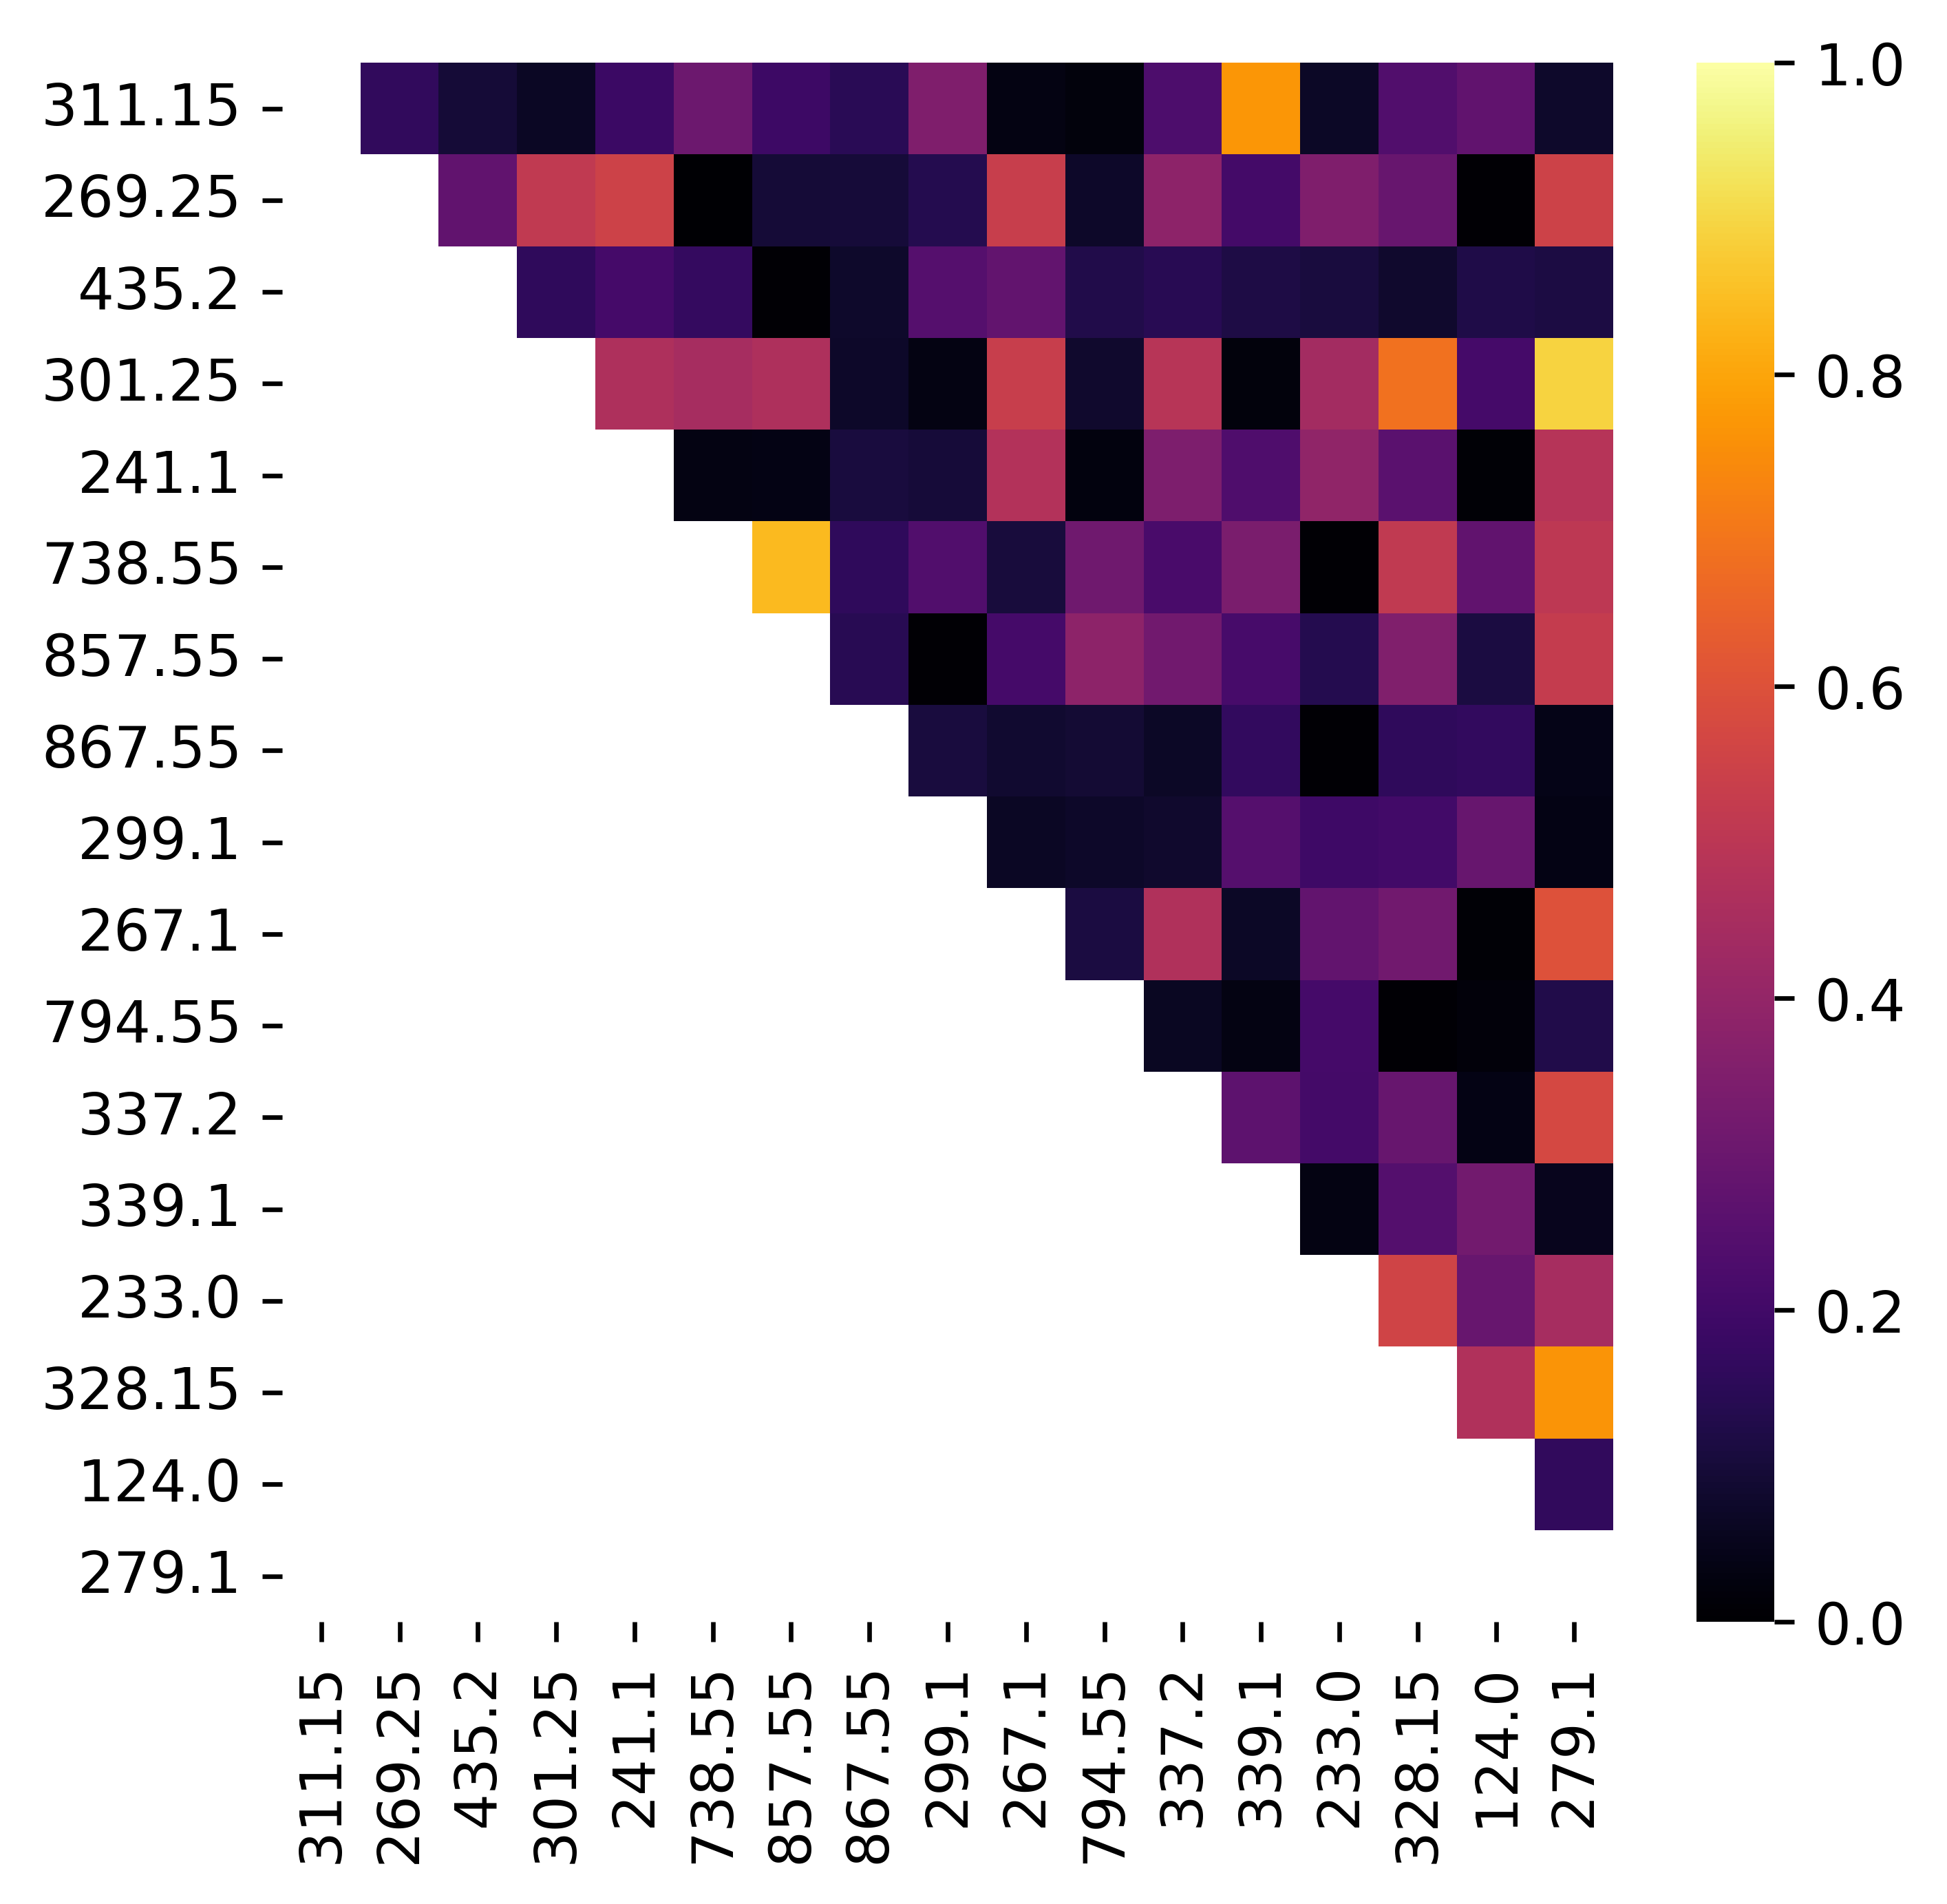

In [13]:
sns_heatmap(mz_corr(trainDEFSDf, "trainDEFSDf"))

In [14]:
mz_corr(extDEFSDf, "extDEFSDf")

,311.15,269.25,435.2,301.25,241.1,738.55,857.55,867.55,299.1,267.1,794.55,337.2,339.1,233.0,328.15,124.0,279.1
311.15,NaN,0.893997,0.595520,0.774954,0.893391,0.742639,0.800743,0.651834,0.471566,0.785869,0.732881,0.835129,0.734595,0.487468,0.708745,0.271857,0.835933
269.25,NaN,NaN,0.707242,0.886700,0.951116,0.787888,0.878948,0.719739,0.358319,0.903821,0.775937,0.902101,0.682407,0.479464,0.842004,0.379525,0.960168
435.2,NaN,NaN,NaN,0.877271,0.610080,0.697072,0.691216,0.505200,0.220774,0.769870,0.701947,0.603897,0.442718,0.062245,0.722381,0.781980,0.756527
301.25,NaN,NaN,NaN,NaN,0.807970,0.758524,0.803882,0.616496,0.308723,0.900632,0.782198,0.790745,0.611194,0.263349,0.858160,0.621968,0.939960
241.1,NaN,NaN,NaN,NaN,NaN,0.788266,0.858997,0.710303,0.428898,0.876893,0.747957,0.897912,0.726959,0.601203,0.764718,0.304007,0.889858
738.55,NaN,NaN,NaN,NaN,NaN,NaN,0.829705,0.546776,0.394073,0.734661,0.856733,0.711992,0.506768,0.391716,0.557567,0.491127,0.714640
857.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.832627,0.381313,0.840589,0.781091,0.827963,0.710074,0.391852,0.791353,0.509186,0.797561
867.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.275007,0.667954,0.542894,0.656228,0.696323,0.241911,0.810689,0.468906,0.642061
299.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.361411,0.339801,0.407405,0.457115,0.371810,0.214536,0.088199,0.294264
267.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.719093,0.865734,0.719039,0.463155,0.823020,0.543880,0.898021


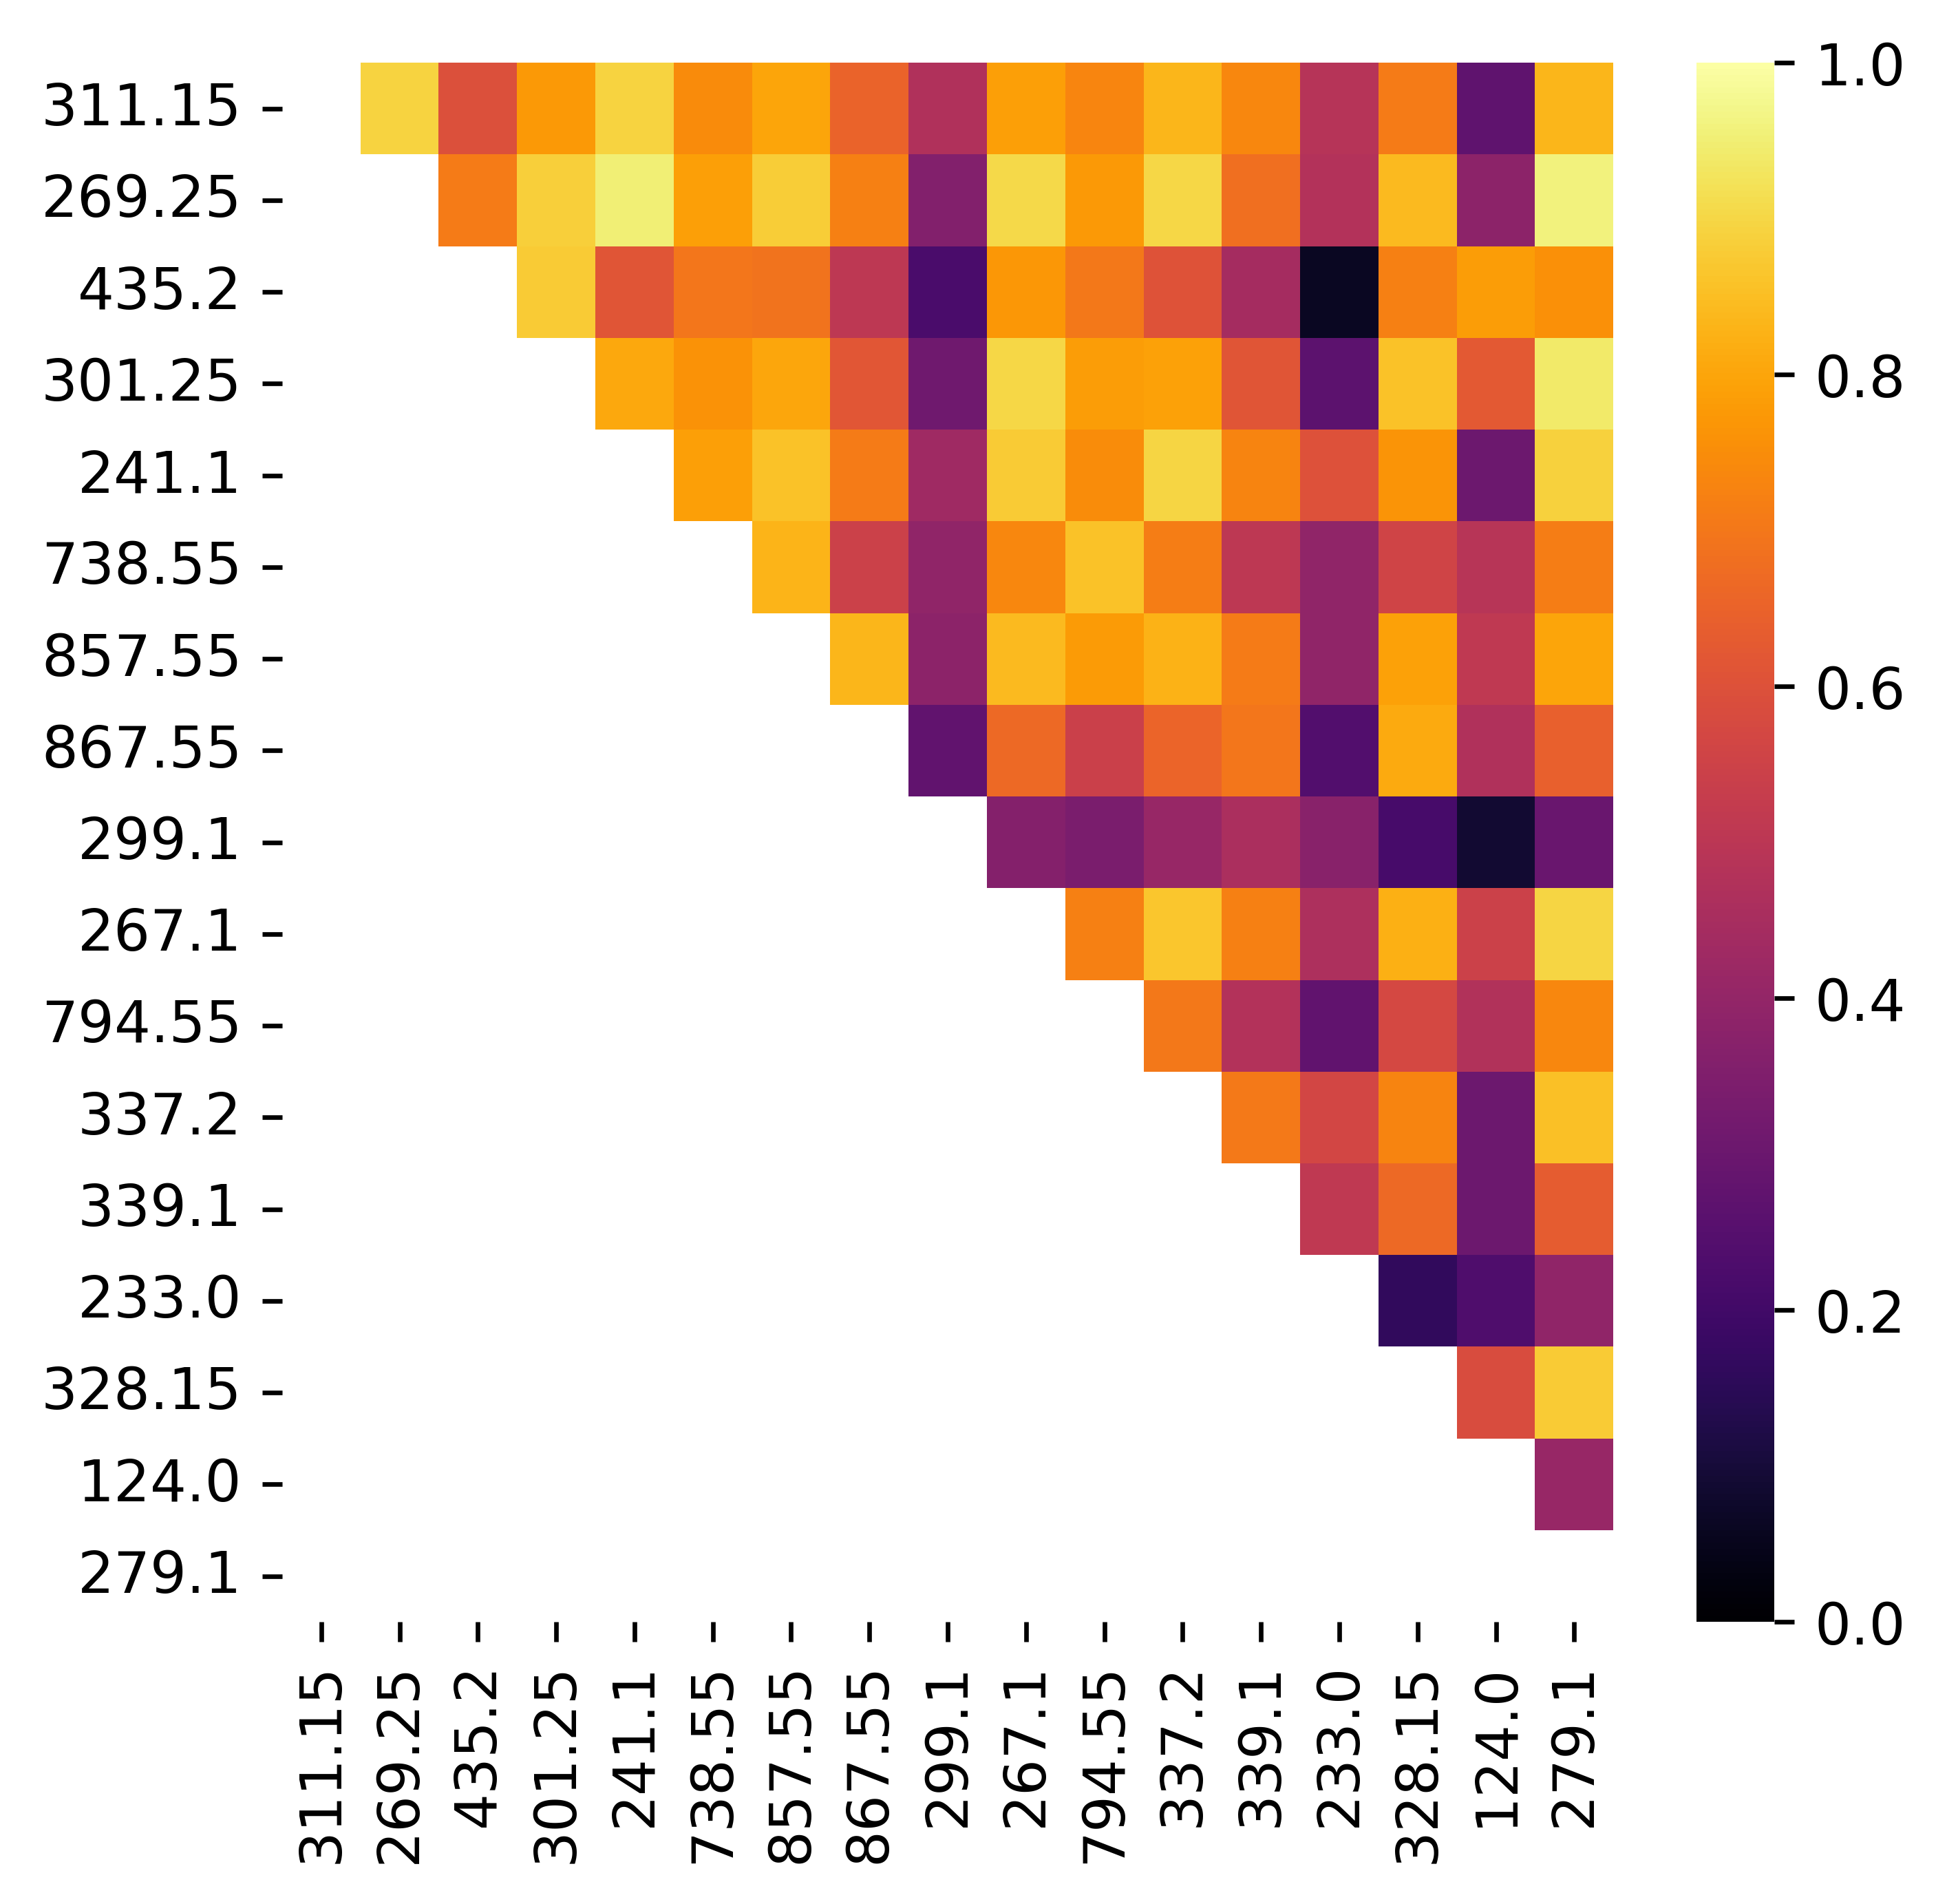

In [15]:
sns_heatmap(mz_corr(extDEFSDf, "extDEFSDf"))

In [16]:
mz_corr(fnaDEFSDf, "fnaDEFSDf")

,311.15,269.25,435.2,301.25,241.1,738.55,857.55,867.55,299.1,267.1,794.55,337.2,339.1,233.0,328.15,124.0,279.1
311.15,NaN,0.693865,0.571134,0.576678,0.410966,0.341385,0.218274,0.111645,0.657802,0.602062,0.562089,0.409688,0.338059,0.434971,0.218729,0.505171,0.641272
269.25,NaN,NaN,0.539793,0.542678,0.484638,0.288733,0.124044,0.111899,0.654166,0.637790,0.543126,0.451645,0.304522,0.493960,0.193721,0.475169,0.607424
435.2,NaN,NaN,NaN,0.640212,0.206188,0.316893,0.278125,0.197979,0.569713,0.436674,0.607397,0.221544,0.189531,0.239415,0.184415,0.530401,0.663008
301.25,NaN,NaN,NaN,NaN,0.120253,0.529961,0.499697,0.075115,0.511559,0.433107,0.719352,0.241626,0.167389,0.223544,0.545047,0.506673,0.921449
241.1,NaN,NaN,NaN,NaN,NaN,0.113996,0.029986,0.031978,0.407562,0.471852,0.071641,0.423700,0.256645,0.559214,0.100560,0.253232,0.182545
738.55,NaN,NaN,NaN,NaN,NaN,NaN,0.599607,0.197015,0.264921,0.249422,0.377229,0.263778,0.128335,0.251636,0.604532,0.429762,0.594348
857.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.170861,0.108403,0.125194,0.425990,0.064124,0.057426,0.087201,0.485163,0.337892,0.558538
867.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.144349,0.075074,0.207890,0.085715,0.024925,0.078535,0.334573,0.015847,0.039092
299.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.567535,0.462411,0.394773,0.304042,0.421124,0.163284,0.505794,0.552769
267.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.414503,0.454620,0.292850,0.486687,0.208369,0.434792,0.498924


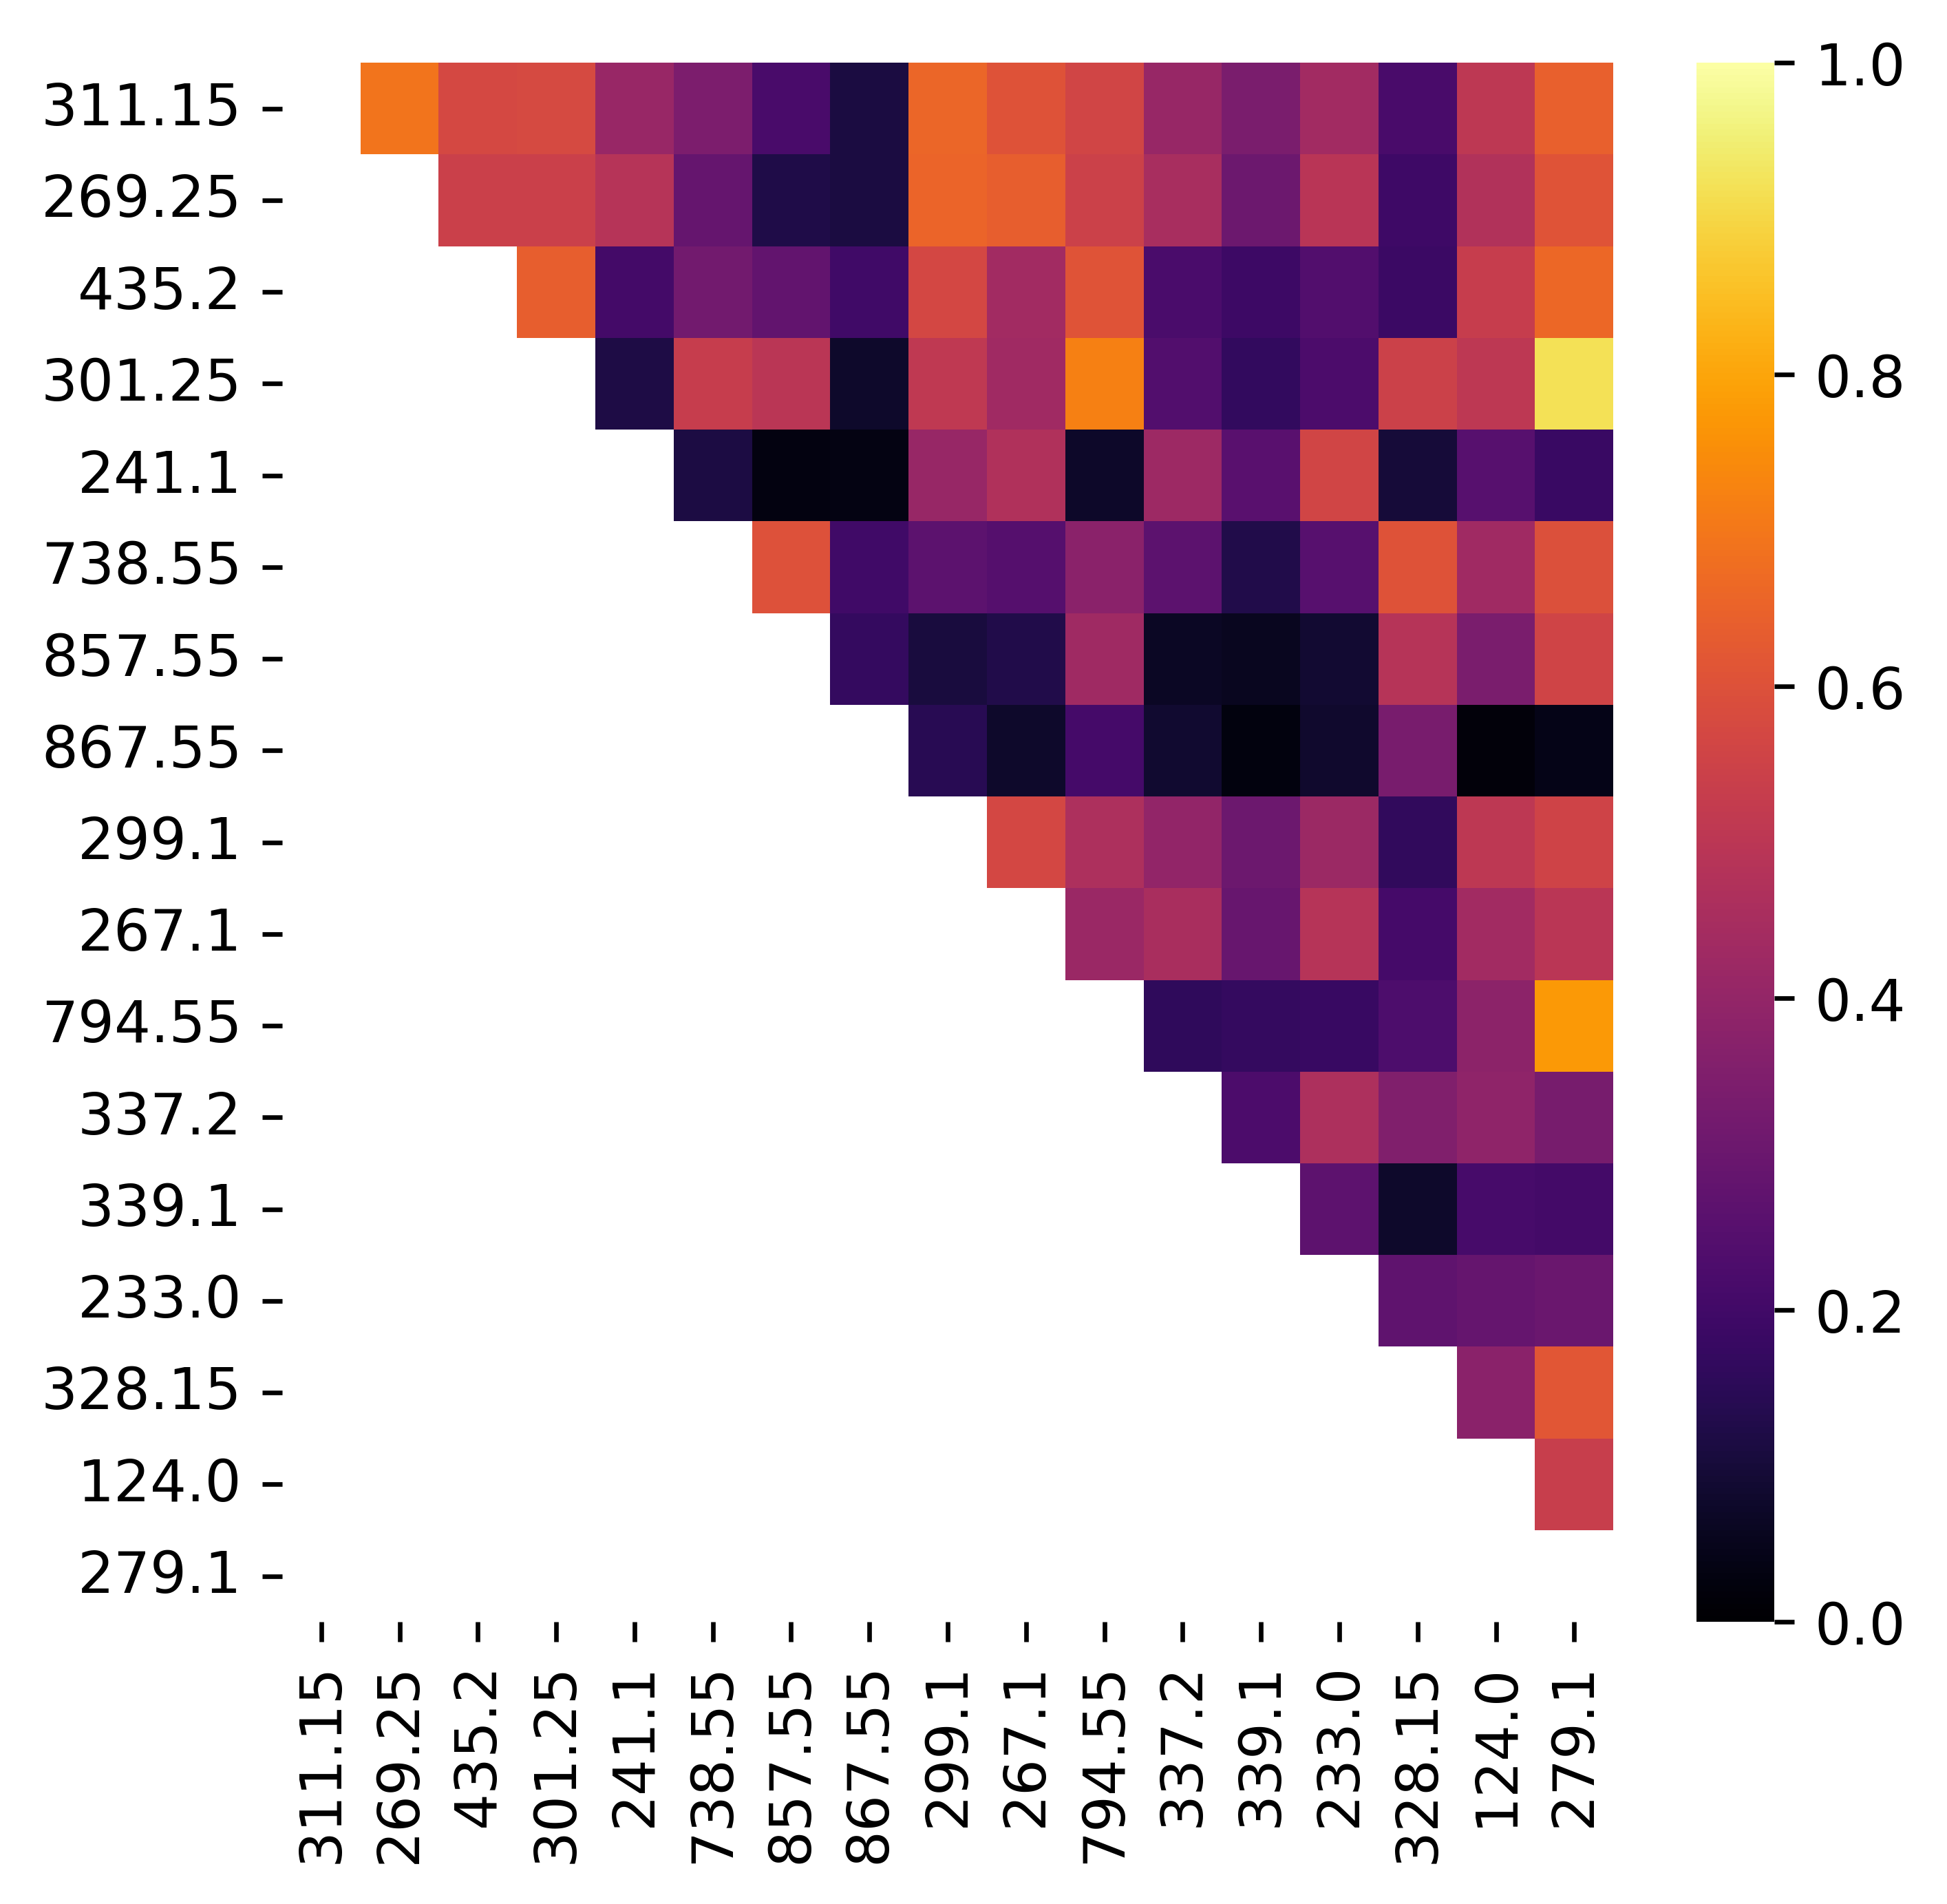

In [17]:
sns_heatmap(mz_corr(fnaDEFSDf, "fnaDEFSDf"))

In [18]:
mz_corr(ingestedDEFSDf, "ingestedDEFSDf")

,311.15,269.25,435.2,301.25,241.1,738.55,857.55,867.55,299.1,267.1,794.55,337.2,339.1,233.0,328.15,124.0,279.1
311.15,NaN,0.054673,0.051845,0.168663,0.027020,0.328669,0.279790,0.229634,0.370306,0.151665,0.161211,0.281731,0.753464,0.156398,0.281187,0.264315,0.217902
269.25,NaN,NaN,0.272582,0.621465,0.779381,0.109868,0.586912,0.534835,0.249929,0.728359,0.558839,0.454866,0.125812,0.603463,0.407617,0.479563,0.747827
435.2,NaN,NaN,NaN,0.272112,0.192722,0.082713,0.108924,0.028355,0.184434,0.290827,0.165699,0.183665,0.087898,0.069491,0.048741,0.181449,0.226742
301.25,NaN,NaN,NaN,NaN,0.537618,0.476368,0.596956,0.275073,0.116893,0.620324,0.363434,0.533616,0.132515,0.424306,0.733920,0.407001,0.881432
241.1,NaN,NaN,NaN,NaN,NaN,0.057179,0.544766,0.549114,0.303341,0.697269,0.545198,0.409191,0.129168,0.667520,0.330596,0.489429,0.655343
738.55,NaN,NaN,NaN,NaN,NaN,NaN,0.634606,0.152089,0.212095,0.157893,0.298213,0.262791,0.312521,0.029622,0.507950,0.220322,0.448629
857.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.657776,0.323701,0.557806,0.697325,0.406180,0.376533,0.355304,0.455551,0.554345,0.717549
867.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.436840,0.448817,0.603527,0.165818,0.384626,0.492158,0.312202,0.636011,0.464669
299.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.243554,0.314556,0.040632,0.388391,0.457733,0.208879,0.478725,0.215884
267.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.499886,0.516781,0.170219,0.530925,0.402028,0.445501,0.705975


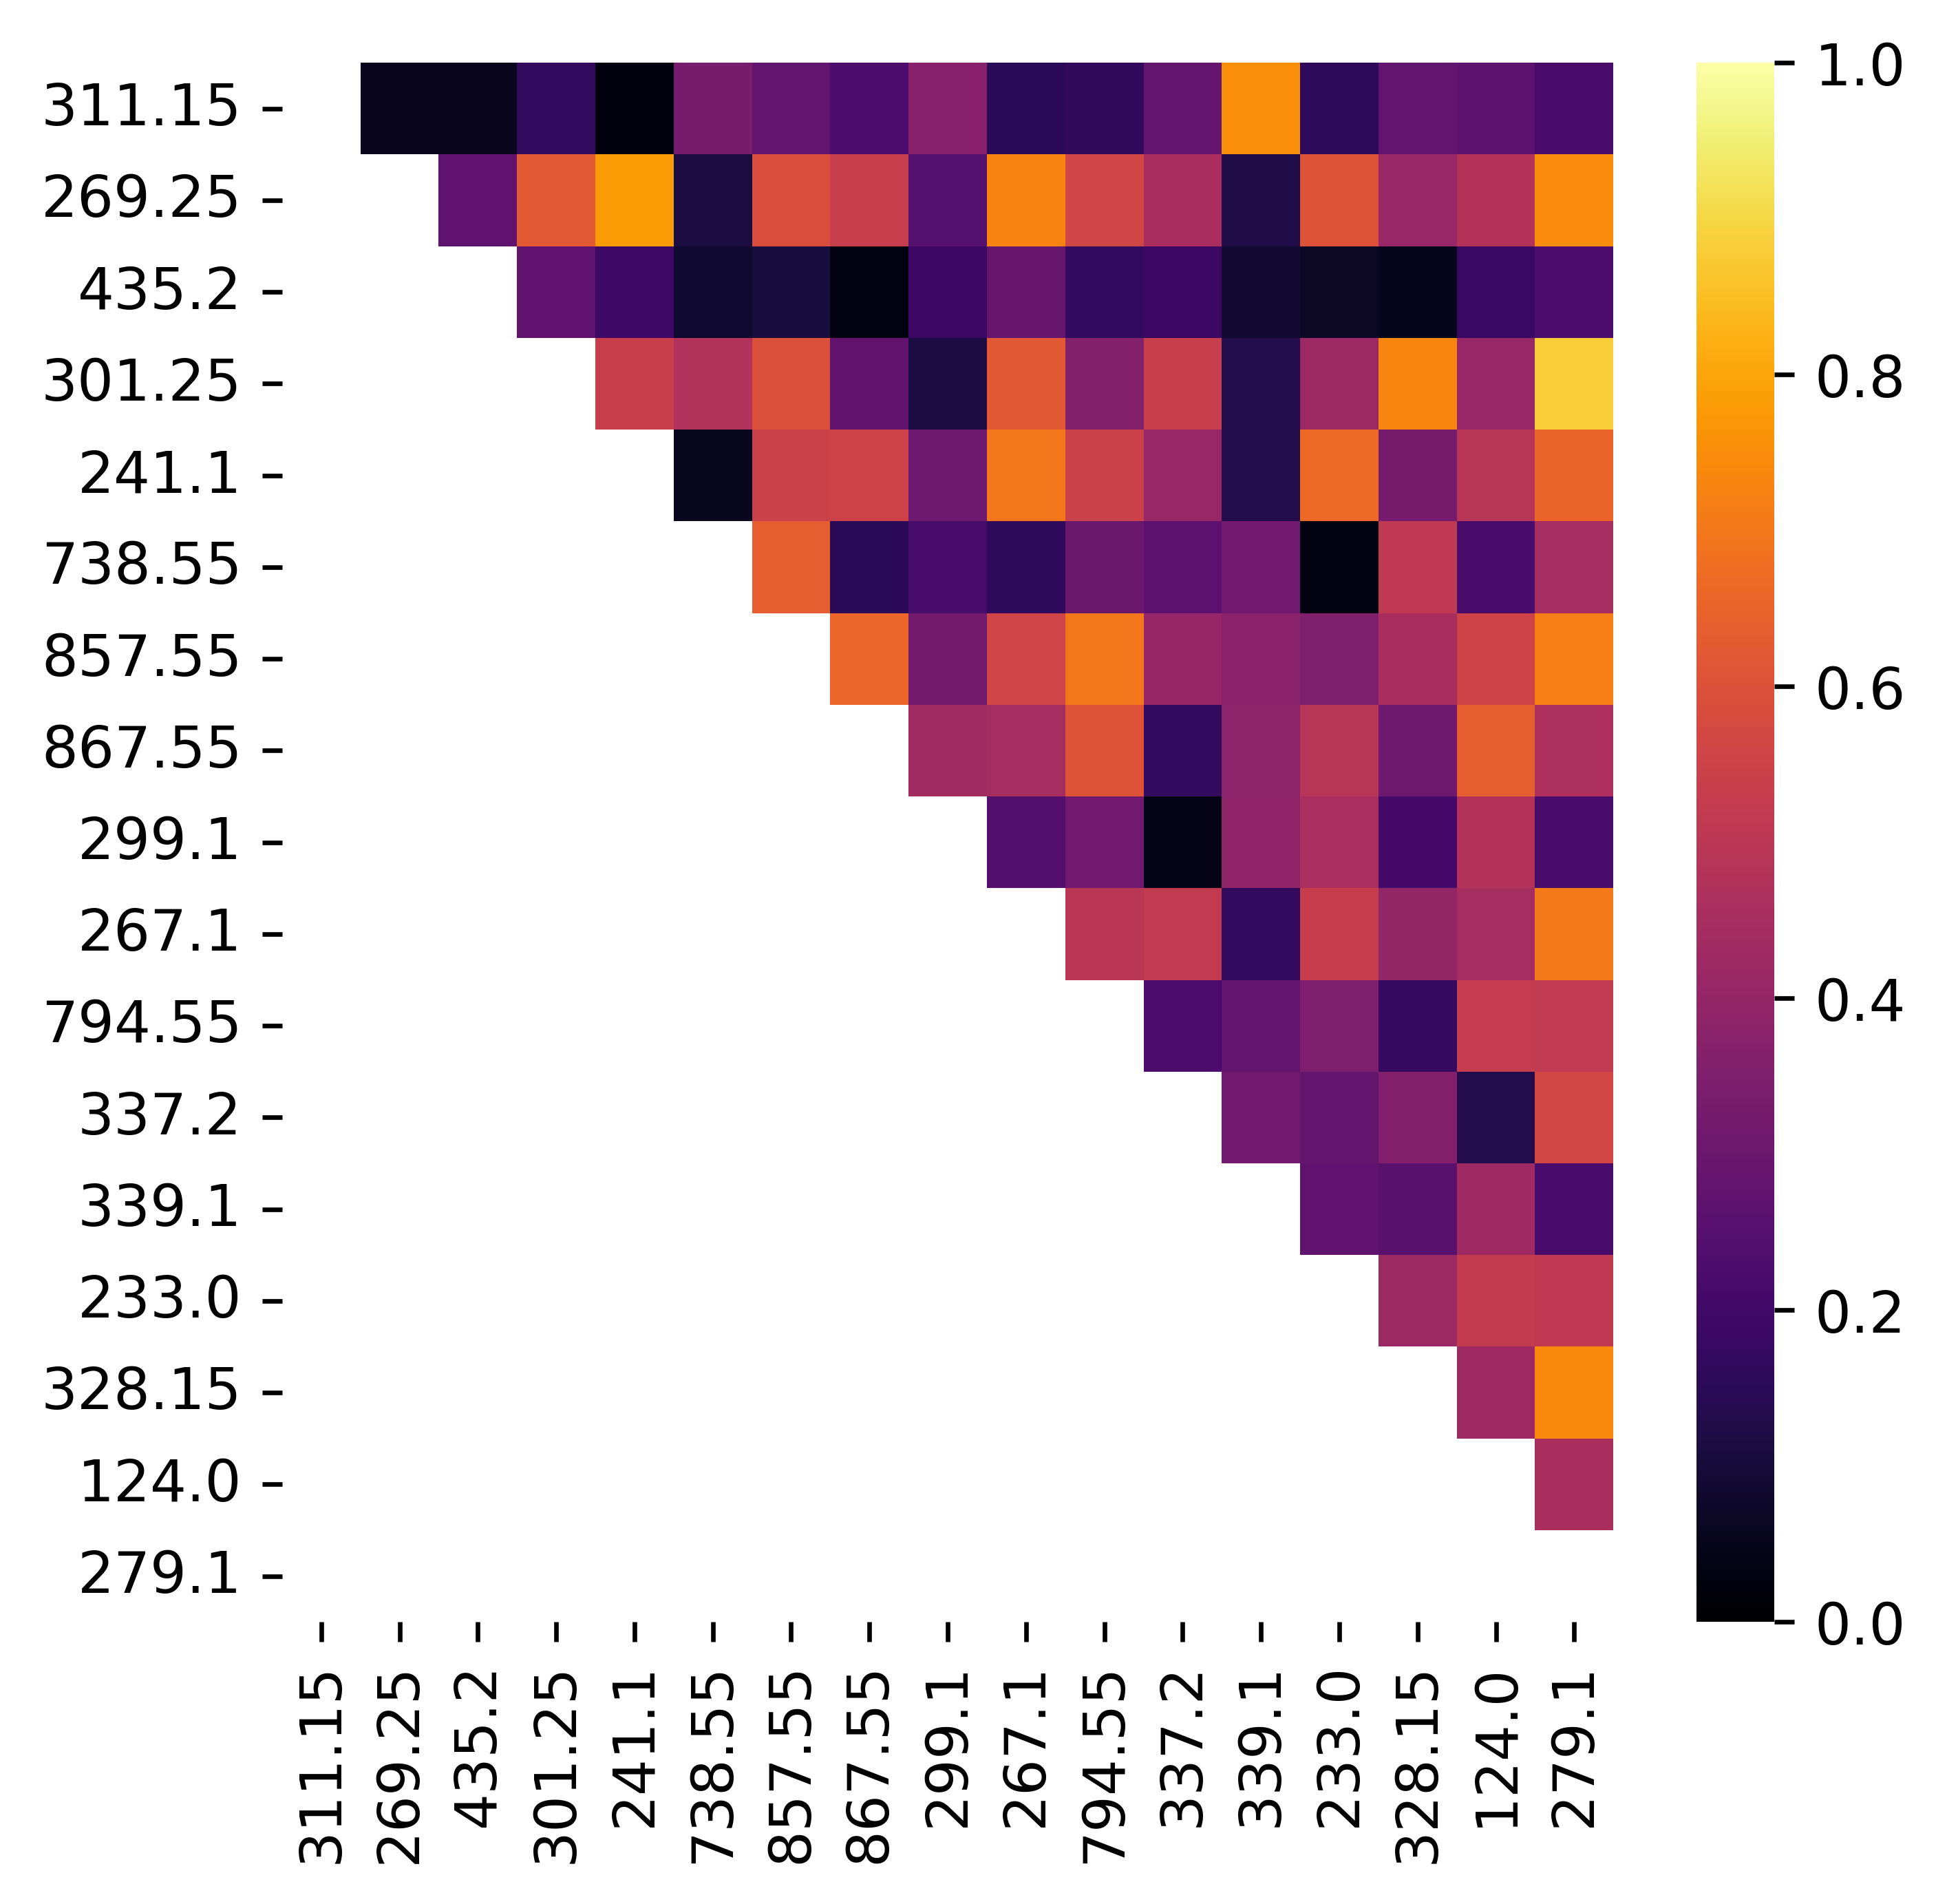

In [19]:
sns_heatmap(mz_corr(ingestedDEFSDf, "ingestedDEFSDf"))

In [20]:
mz_corr(diDEFSDf, "diDEFSDf")

,311.15,269.25,435.2,301.25,241.1,738.55,857.55,867.55,299.1,267.1,794.55,337.2,339.1,233.0,328.15,124.0,279.1
311.15,NaN,0.427232,0.592406,0.406273,0.398430,0.236526,0.209799,0.165506,0.634752,0.277140,0.074464,0.620567,0.922456,0.235627,0.377302,0.150378,0.373650
269.25,NaN,NaN,0.277207,0.652545,0.680824,0.061193,0.047637,0.129910,0.852704,0.466138,0.037504,0.611680,0.468971,0.354637,0.491452,0.358030,0.405666
435.2,NaN,NaN,NaN,0.425570,0.327545,0.235329,0.426713,0.209437,0.325346,0.702810,0.049952,0.296964,0.487146,0.124629,0.032047,0.546096,0.068618
301.25,NaN,NaN,NaN,NaN,0.637906,0.232543,0.224383,0.051806,0.642101,0.541939,0.130574,0.613932,0.494567,0.421338,0.560945,0.420996,0.659531
241.1,NaN,NaN,NaN,NaN,NaN,0.233435,0.186018,0.053451,0.619090,0.510484,0.076634,0.684394,0.504588,0.595419,0.384294,0.494474,0.419779
738.55,NaN,NaN,NaN,NaN,NaN,NaN,0.749136,0.386570,0.029426,0.175199,0.685865,0.435902,0.406526,0.476578,0.035258,0.057351,0.260910
857.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.272638,0.002074,0.320779,0.603739,0.293224,0.318713,0.345000,0.127763,0.185149,0.106085
867.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.122030,0.142157,0.479899,0.039534,0.027726,0.073118,0.221296,0.215985,0.161547
299.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.363178,0.028646,0.625555,0.614027,0.276903,0.626341,0.294128,0.455096
267.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.122621,0.352089,0.266950,0.147686,0.127144,0.861977,0.253697


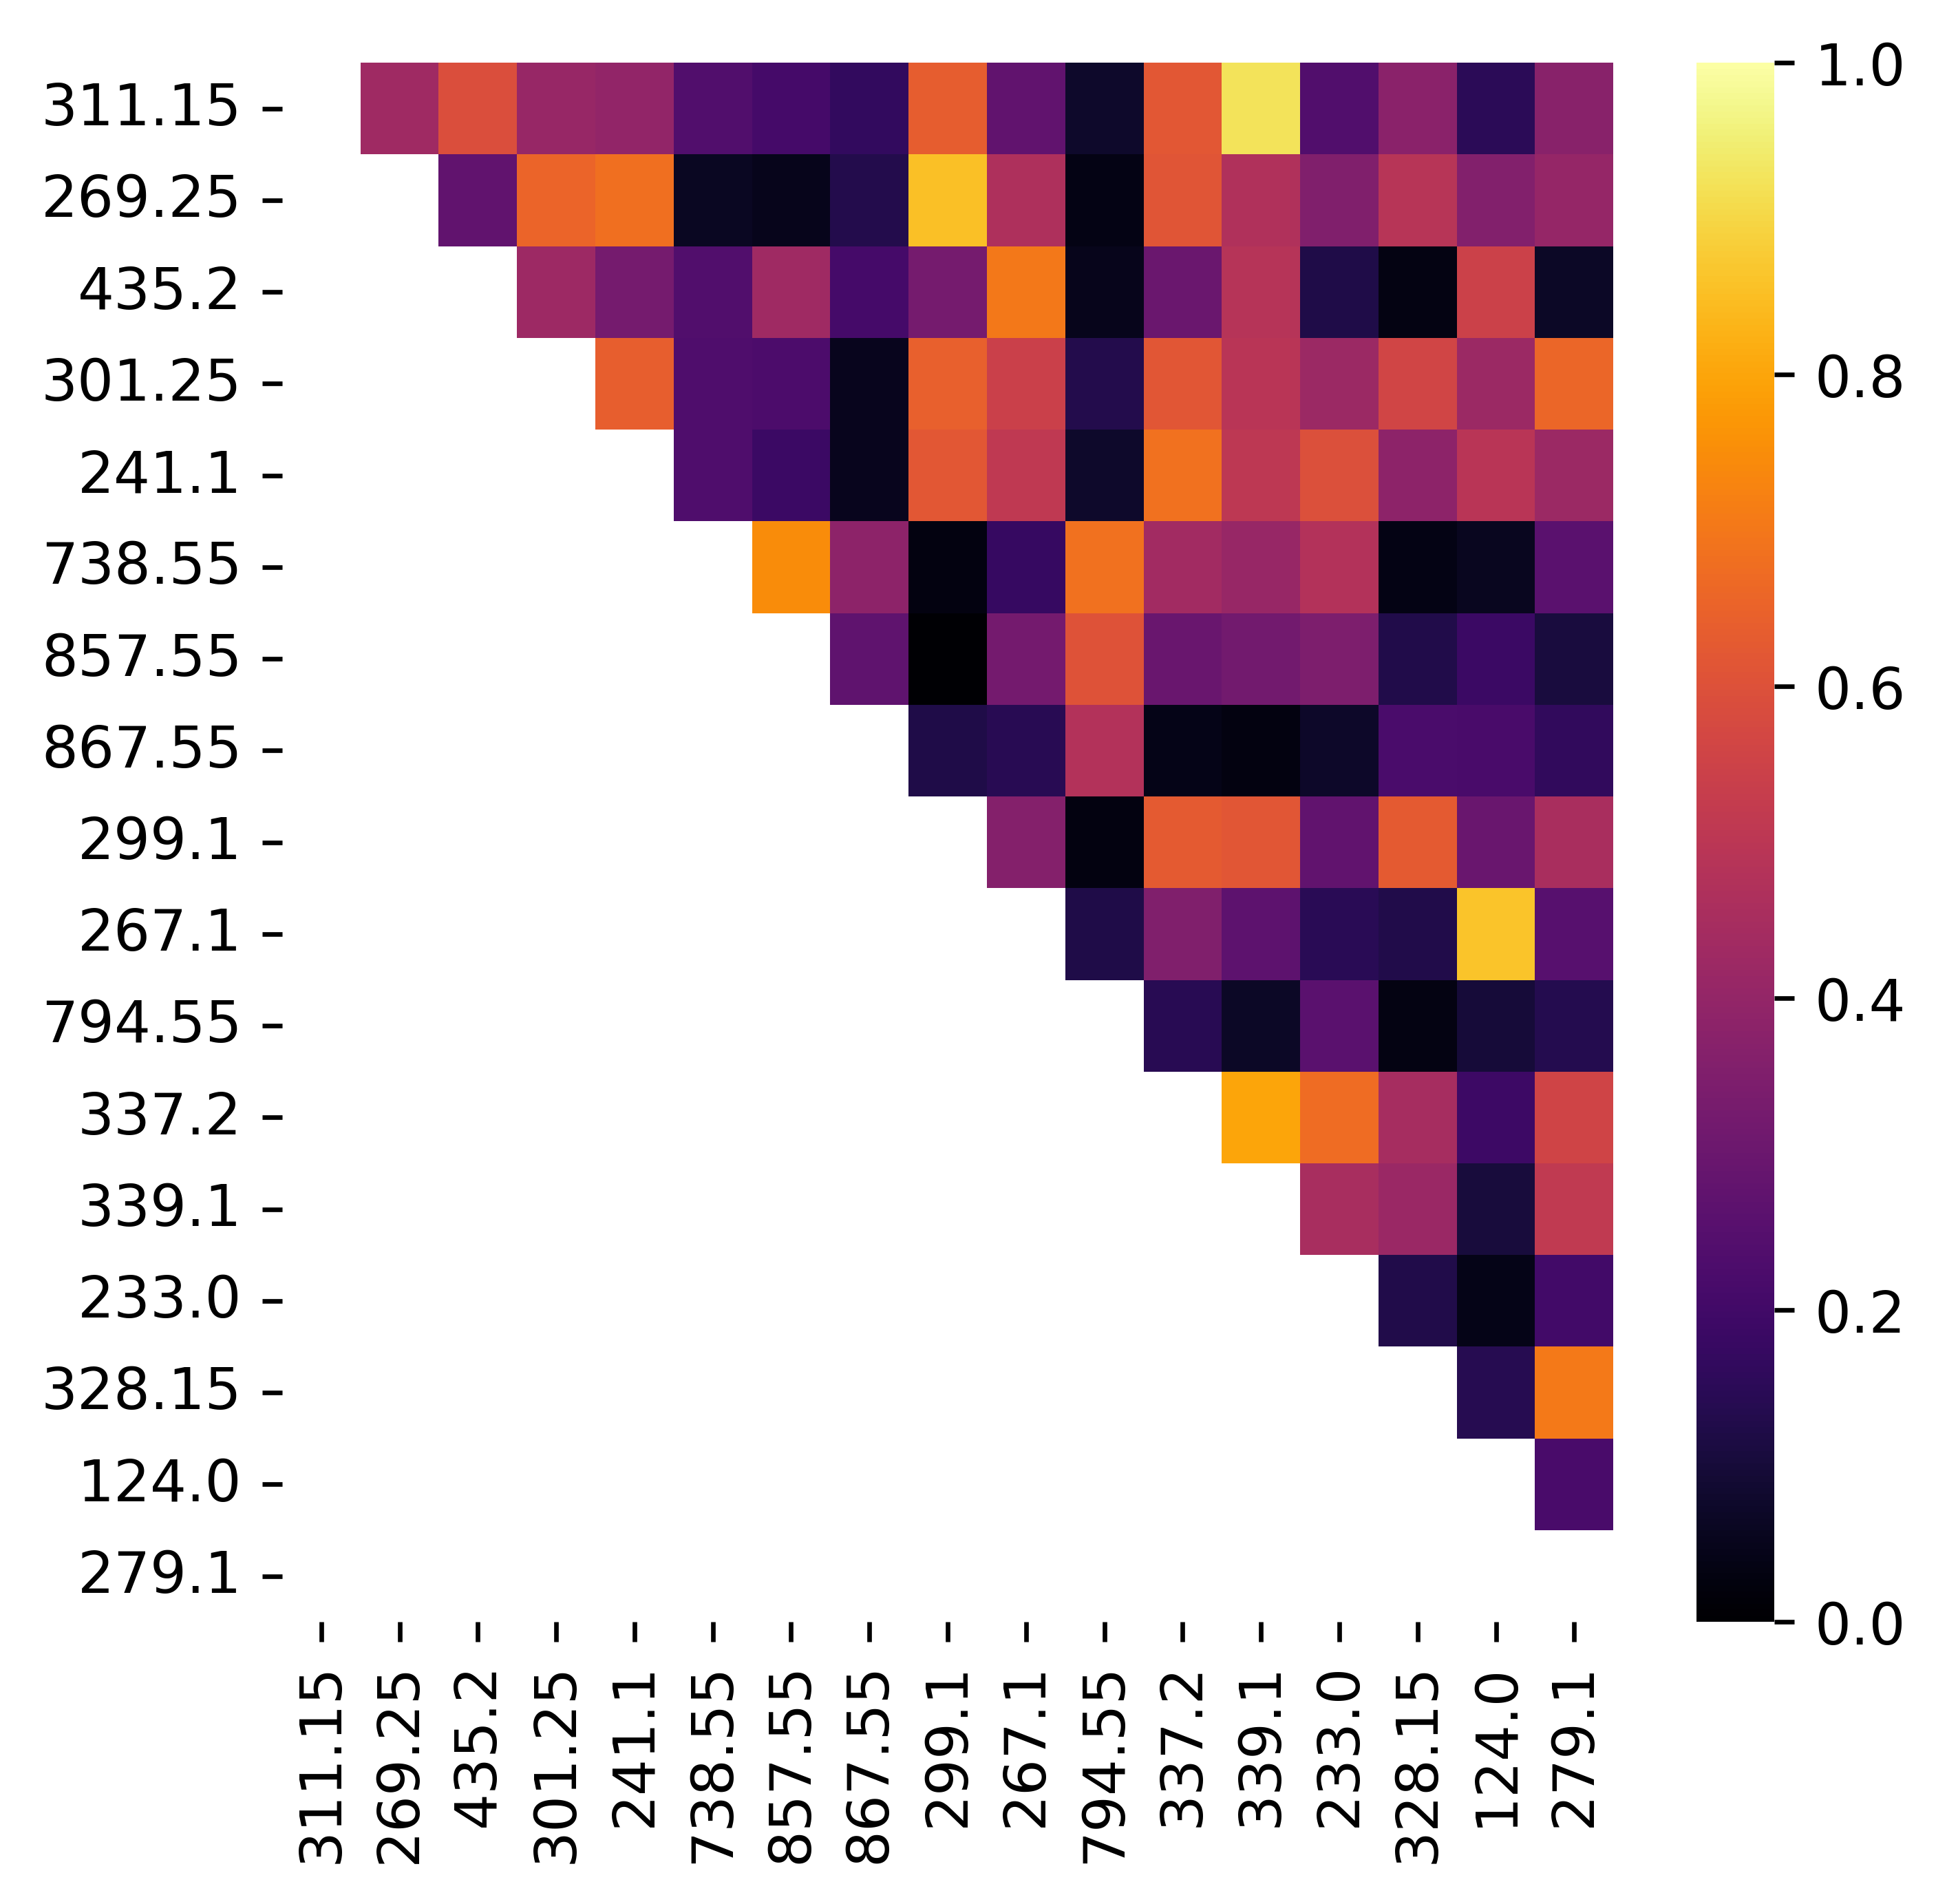

In [21]:
sns_heatmap(mz_corr(diDEFSDf, "diDEFSDf"))